### Evaluation of prediction of each category

In [1]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#############################################
def is_Exist_file(path):
    import os
    if os.path.exists(path):
        os.remove(path)


def mkdir(path):
    import os
    path = path.strip()  # 去除首位空格
    path = path.rstrip("\\")  # 去除尾部 \ 符号
    isExists = os.path.exists(path)  # 判断路径是否存在
    # 判断结果
    if not isExists:
        os.makedirs(path)  # 如果不存在则创建目录
        print(path + ' 创建成功')
    else:
        print(path + ' 目录已存在')  # 如果目录存在则不创建，并提示目录已存在


## 需要遍历的目录树的路径
## 路径和文件名连接构成完整路径
def walk(path):
    import os
    input_path_list = []
    if not os.path.exists(path):
        return -1
    for root, dirs, names in os.walk(path):
        for filename in names:
            input_path = os.path.join(root, filename)
            input_path_list.append(input_path)
            # print(os.path.join(root,filename)) # 路径和文件名连接构成完整路径
    return input_path_list
#############################################

In [3]:
## plot adjusted category's correlation
def corr_boxplot_k562(data_list, delt_name_list, inser_name_list, 
                title, savefig_path, metric):
    import seaborn as sns
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(9.0, 4.0))  # 创建画布
    ax = plt.subplot()  # 创建作图区域

    ax.boxplot(data_list, flierprops={'marker':'o','markerfacecolor':'lightgrey','markersize':3}) 

    ## 设置坐标轴
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xlabel("Length of gRNA repair", fontsize=10, weight='bold')
    if metric == 'spearman':
        plt.ylabel("Spearman Coefficient", fontsize=10, weight='bold')
    else:
        plt.ylabel("Pearson Coefficient", fontsize=10, weight='bold')
    ## Annotation
    # deletions
    plt.annotate(s='',xy=(0.5, 0.05),xytext=(18.6, 0.05),weight='bold',arrowprops=dict(arrowstyle='-',color='black'))
    plt.text(1+10,0.0, 'Deletion', ha='center', va='bottom', fontsize=8, weight='bold')
    # insertions
    plt.annotate(s='',xy=(19.4,0.05),xytext=(22.7,0.05),weight='bold',arrowprops=dict(arrowstyle='-',color='black'))
    plt.text(1+20,0.0, 'Insertion', ha='center', va='bottom', fontsize=8, weight='bold')


    ## xticks
    x1 = np.array(range(1, len(delt_name_list)+1, 1)) -1 
    x2 = np.array(list(range(len(inser_name_list)))) + len(delt_name_list) + 1
    x = np.array(list(x1) + list(x2)) + 1
    xticks = [i.split('-')[1] for i in delt_name_list] + [i.split('-')[1] for i in inser_name_list]
    plt.xticks(x, xticks, fontsize=8, weight='bold')
    ## lim
    plt.ylim(0, 1)
    plt.xlim(0.5,22)
    ## title
    plt.title(title, fontsize=10, weight='bold')
    ## save
    plt.savefig(savefig_path, dpi=300, bbox_inches = 'tight')
    plt.show()
    

## For Jurkat
def corr_boxplot_jurkat(data_list, delt_name_list, inser_name_list, 
                title, savefig_path, metric):
    import seaborn as sns
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(9.0, 4.0))  # 创建画布
    ax = plt.subplot()  # 创建作图区域

    ax.boxplot(data_list, flierprops={'marker':'o','markerfacecolor':'lightgrey','markersize':3}) 

    ## 设置坐标轴
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xlabel("Length of gRNA repair", fontsize=10, weight='bold')
    if metric == 'spearman':
        plt.ylabel("Spearman Coefficient", fontsize=10, weight='bold')
    else:
        plt.ylabel("Pearson Coefficient", fontsize=10, weight='bold')
    ## Annotation
    # deletions
    delt = 1
    plt.annotate(s='',xy=(1+0.5-delt, 0.05),xytext=(1+19.6-delt, 0.05),weight='bold',
                 arrowprops=dict(arrowstyle='-',color='black'))
    plt.text(1+11-delt,0.0, 'Deletion', ha='center', va='bottom', fontsize=8, weight='bold')
    # insertions
    plt.annotate(s='',xy=(1+20.4-delt,0.05),xytext=(1+26.7-delt,0.05),weight='bold',arrowprops=dict(arrowstyle='-',color='black'))
    plt.text(1+23.5-delt,0.0, 'Insertion', ha='center', va='bottom', fontsize=8, weight='bold')


    ## xticks
    x1 = np.array(range(1, len(delt_name_list)+1, 1))-delt
    x2 = np.array(list(range(len(inser_name_list)))) + len(delt_name_list) + 2-delt
    x = np.array(list(x1) + list(x2)) + 1
    xticks = [i.split('-')[1] for i in delt_name_list] + [i.split('-')[1] for i in inser_name_list]
    plt.xticks(x, xticks, fontsize=8, weight='bold')
    ## lim
    plt.ylim(0, 1)
    plt.xlim(1+0.5-delt,26.5-delt)
    ## title
    plt.title(title, fontsize=10, weight='bold')
    ## save
    plt.savefig(savefig_path, dpi=300, bbox_inches = 'tight')
    plt.show()

In [4]:
## plot adjusted category's correlation
def corr_swarmplot_k562(data_list, delt_name_list, inser_name_list, 
                title, savefig_path, metric):
    import seaborn as sns
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(9.0, 4.0))  # 创建画布
    ax = plt.subplot()  # 创建作图区域

    # ax.boxplot(data_list, flierprops={'marker':'o','markerfacecolor':'lightgrey','markersize':3}) 
    # 分类散点图
    dataframe_list = []
    all_name_list = delt_name_list + inser_name_list
    order = delt_name_list + [' '] + inser_name_list
    i = 0
    print(len(all_name_list), len(data_list))
    for index, dlist in enumerate(data_list):
        if len(dlist) != 0:
            temp = pd.DataFrame({'corr': dlist, 'name': [all_name_list[index-i]]* len(dlist)})
            dataframe_list.append(temp)
        else:
            i = 1
    data = pd.concat(dataframe_list, axis=0)
    data.reset_index(drop=True, inplace=True)
    ax = sns.swarmplot(x="name", y="corr", data=data, order=order, s=3)

    ## 设置坐标轴
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xlabel("Length of gRNA repair", fontsize=10, weight='bold')
    if metric == 'spearman':
        plt.ylabel("Spearman Coefficient", fontsize=10, weight='bold')
    else:
        plt.ylabel("Pearson Coefficient", fontsize=10, weight='bold')
    ## Annotation
    # deletions
    plt.annotate(s='',xy=(-0.5, 0.05),xytext=(17.6, 0.05),weight='bold',arrowprops=dict(arrowstyle='-',color='black'))
    plt.text(10,0.0, 'Deletion', ha='center', va='bottom', fontsize=8, weight='bold')
    # insertions
    plt.annotate(s='',xy=(18.4,0.05),xytext=(21.7,0.05),weight='bold',arrowprops=dict(arrowstyle='-',color='black'))
    plt.text(20,0.0, 'Insertion', ha='center', va='bottom', fontsize=8, weight='bold')


    ## xticks
    x1 = np.array(range(1, len(delt_name_list)+1, 1)) -1 
    x2 = np.array(list(range(len(inser_name_list)))) + len(delt_name_list) + 1
    x = list(x1) + list(x2)
    xticks = [i.split('-')[1] for i in delt_name_list] + [i.split('-')[1] for i in inser_name_list]
    plt.xticks(x, xticks, fontsize=8, weight='bold')
    ## lim
    plt.ylim(0, 1)
    plt.xlim(-0.5,22)
    ## title
    plt.title(title, fontsize=10, weight='bold')
    ## save
    plt.savefig(savefig_path, dpi=300, bbox_inches = 'tight')
    plt.show()
    

## For Jurkat
def corr_swarmplot_jurkat(data_list, delt_name_list, inser_name_list, 
                title, savefig_path, metric):
    import seaborn as sns
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(9.0, 4.0))  # 创建画布
    ax = plt.subplot()  # 创建作图区域

    # ax.boxplot(data_list, flierprops={'marker':'o','markerfacecolor':'lightgrey','markersize':3}) 
    # 分类散点图
    dataframe_list = []
    all_name_list = delt_name_list + inser_name_list
    order = delt_name_list + [' '] + inser_name_list
    i = 0
    for index, dlist in enumerate(data_list):
        if len(dlist) != 0:
            temp = pd.DataFrame({'corr': dlist, 'name': [all_name_list[index-i]]* len(dlist)})
            dataframe_list.append(temp)
        else:
            i = 1
    data = pd.concat(dataframe_list, axis=0)
    data.reset_index(drop=True, inplace=True)
    ax = sns.swarmplot(x="name", y="corr", data=data, order=order, s=3)

    ## 设置坐标轴
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xlabel("Length of gRNA repair", fontsize=10, weight='bold')
    if metric == 'pearson':
        plt.ylabel("Pearson Coefficient", fontsize=10, weight='bold')
    else:
        
        plt.ylabel("Spearman Coefficient", fontsize=10, weight='bold')
    ## Annotation
    # deletions
    delt = 1
    plt.annotate(s='',xy=(0.5-delt, 0.05),xytext=(19.6-delt, 0.05),weight='bold',
                 arrowprops=dict(arrowstyle='-',color='black'))
    plt.text(11-delt,0.0, 'Deletion', ha='center', va='bottom', fontsize=8, weight='bold')
    # insertions
    plt.annotate(s='',xy=(20.4-delt,0.05),xytext=(26.7-delt,0.05),weight='bold',arrowprops=dict(arrowstyle='-',color='black'))
    plt.text(23.5-delt,0.0, 'Insertion', ha='center', va='bottom', fontsize=8, weight='bold')


    ## xticks
    x1 = np.array(range(1, len(delt_name_list)+1, 1))-delt
    x2 = np.array(list(range(len(inser_name_list)))) + len(delt_name_list) + 2-delt
    x = list(x1) + list(x2)
    xticks = [i.split('-')[1] for i in delt_name_list] + [i.split('-')[1] for i in inser_name_list]
    plt.xticks(x, xticks, fontsize=8, weight='bold')
    ## lim
    plt.ylim(0, 1)
    plt.xlim(0.5-delt,26.5-delt)
    ## title
    plt.title(title, fontsize=10, weight='bold')
    ## save
    plt.savefig(savefig_path, dpi=300, bbox_inches = 'tight')
    plt.show()

    
def helper_parse_repair_length(a):
    if 'I' in a:
        return a.split('_')[0]
    else:
        return 'D-' + a.split('-')[-1]

    
def cor_plot_data(eval_data, delt_name_list, inser_name_list, metric):
    eval_data['NC1'] = eval_data['DSB Repair Category'].apply(lambda x: helper_parse_repair_length(x))
    if metric == 'spearman':
        delt_data = [eval_data.loc[eval_data['NC1']==c, :]['Spearman correlation'].tolist() for c in delt_name_list]
        inser_data = [eval_data.loc[eval_data['NC1']==c, :]['Spearman correlation'].tolist() for c in inser_name_list]
    elif metric == 'pearson':
        delt_data = [eval_data.loc[eval_data['NC1']==c, :]['Pearson correlation'].tolist() for c in delt_name_list]
        inser_data = [eval_data.loc[eval_data['NC1']==c, :]['Pearson correlation'].tolist() for c in inser_name_list]
    else:
        print("Error: metric is %s, not in [pearson, spearman]."%(metric))
    data_list = delt_data + [[]] + inser_data
    return data_list
################################################################################

./pdf/DSB/Fig40-41-evaluation for each category 目录已存在


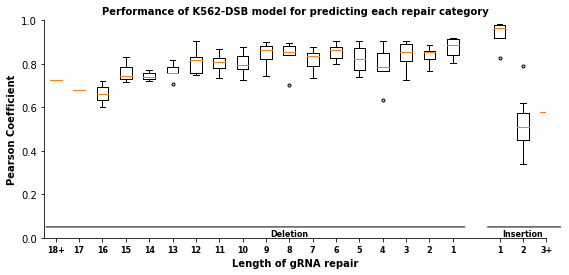

21 22


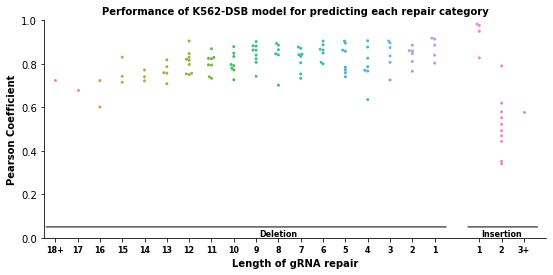

Finish.


In [5]:
## For K562 -- evaluation of each category
if __name__ == '__main__':
    main_path = "../../data"
    os.chdir(main_path)
    figsuplix = 'pdf'


    cell_line = 'K562'
    eval_data_path = './DSB/Prediction/Self-%s/Self-Evaluation.csv'%(cell_line)
    eval_data = pd.read_csv(eval_data_path)

    delt_name_list = ['D-18+','D-17','D-16','D-15','D-14','D-13','D-12','D-11', 
                     'D-10','D-9','D-8','D-7','D-6','D-5','D-4','D-3','D-2','D-1'] 
    inser_name_list = ['I-1','I-2','I-3+'] 
    metric = "pearson"
    data_list = cor_plot_data(eval_data, delt_name_list, inser_name_list, metric)
    ## boxplot 
    title = 'Performance of %s-DSB model for predicting each repair category'%(cell_line)
    save_dir = './%s/DSB/Fig40-41-evaluation for each category'%figsuplix
    mkdir(save_dir)
    savefig_box_path = save_dir + '/%s-box-%s.%s'%(title, metric, figsuplix)
    savefig_swarm_path = save_dir + '/%s-swarm-%s.%s'%(title, metric, figsuplix)
    corr_boxplot_k562(data_list, delt_name_list, inser_name_list, title, savefig_box_path, metric)
    corr_swarmplot_k562(data_list, delt_name_list, inser_name_list, title, savefig_swarm_path, metric)
    print("Finish.")

./pdf/DSB/Fig40-41-evaluation for each category 目录已存在


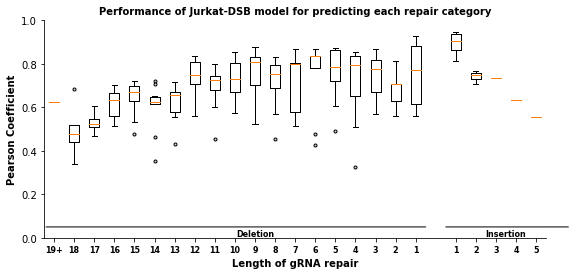

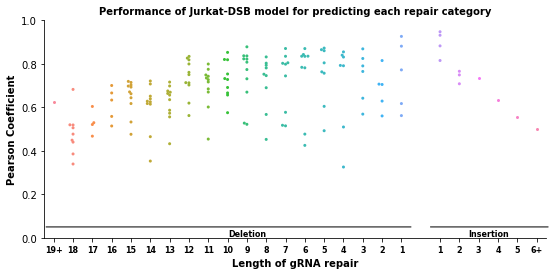

Finish.


In [6]:
## For Jurkat -- evaluation of each category
if __name__ == '__main__':
    cell_line = 'Jurkat'
    eval_data_path = './DSB/Prediction/Self-%s/Self-Evaluation.csv'%(cell_line)
    eval_data = pd.read_csv(eval_data_path)

    delt_name_list = ['D-19+', 'D-18','D-17','D-16','D-15','D-14','D-13','D-12','D-11', 
                     'D-10','D-9','D-8','D-7','D-6','D-5','D-4','D-3','D-2','D-1'] 
    inser_name_list = ['I-1','I-2','I-3', 'I-4', 'I-5', 'I-6+']  
    metric = "pearson"
    data_list = cor_plot_data(eval_data, delt_name_list, inser_name_list, metric)
    ## boxplot 
    title = 'Performance of %s-DSB model for predicting each repair category'%(cell_line)
    save_dir = './%s/DSB/Fig40-41-evaluation for each category'%figsuplix
    mkdir(save_dir)
    savefig_box_path = save_dir + '/%s-box-%s.%s'%(title, metric, figsuplix)
    savefig_swarm_path = save_dir + '/%s-swarm-%s.%s'%(title, metric, figsuplix)
    corr_boxplot_jurkat(data_list, delt_name_list, inser_name_list, title, savefig_box_path, metric)
    corr_swarmplot_jurkat(data_list, delt_name_list, inser_name_list, title, savefig_swarm_path, metric)
    print("Finish.")

### Comparison with other tools (including ForeCast and Lindel)

In [7]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [8]:
#############################################
def is_Exist_file(path):
    import os
    if os.path.exists(path):
        os.remove(path)


def mkdir(path):
    import os
    path = path.strip()  # 去除首位空格
    path = path.rstrip("\\")  # 去除尾部 \ 符号
    isExists = os.path.exists(path)  # 判断路径是否存在
    # 判断结果
    if not isExists:
        os.makedirs(path)  # 如果不存在则创建目录
        print(path + ' 创建成功')
    else:
        print(path + ' 目录已存在')  # 如果目录存在则不创建，并提示目录已存在


## 需要遍历的目录树的路径
## 路径和文件名连接构成完整路径
def walk(path):
    import os
    input_path_list = []
    if not os.path.exists(path):
        return -1
    for root, dirs, names in os.walk(path):
        for filename in names:
            input_path = os.path.join(root, filename)
            input_path_list.append(input_path)
            # print(os.path.join(root,filename)) # 路径和文件名连接构成完整路径
    return input_path_list
#############################################

In [9]:
## Get DSB Repair Modeling plot data 
def get_all_models_plot_data(data_dir):
    data_label_list = ['Self-K562', 'ForeCasT_Lindel', 'Self-Jurkat']
    model_list = ['K562', 'Lindel', 'ForeCasT', 'Jurkat']
    data_list = []
    cell_line = 'K562'
    for data_label in data_label_list:
        for model_label in model_list:
            data_path = data_dir + '/Self-%s/eval_%s_Test_by_%s_based_on_%s_labels.csv'%(cell_line, data_label, model_label, cell_line)
            if os.path.exists(data_path):
                data = pd.read_csv(data_path)
                data_list.append(data)
                data['data_label'] = data_label
                data['model_label'] = model_label
    ## For Jurkat - DSB repair model
    model_label = 'Jurkat'
    for data_label in data_label_list:
        data_path = data_dir + '/Self-%s/eval_%s_Test_by_%s_based_on_%s_labels.csv'%(model_label, data_label, model_label, model_label)
        if os.path.exists(data_path):
            data = pd.read_csv(data_path)
            data_list.append(data)
            data['data_label'] = data_label
            data['model_label'] = model_label
    ## concat
    data = pd.concat(data_list, axis=0)
    data.reset_index(drop=True, inplace=True)
    return data


def get_one_cell_line_models_plot_data(cell_line, data_dir):
    data_label_list = ['Self-K562', 'ForeCasT_Lindel', 'Self-Jurkat']
    model_list = ['K562', 'Jurkat', 'Lindel', 'ForeCasT']
    data_list = []
    for data_label in data_label_list:
        for model_label in model_list:
            data_path = data_dir + '/Self-%s/eval_%s_Test_by_%s_based_on_%s_labels.csv'%(cell_line, data_label, model_label, cell_line)
            if os.path.exists(data_path):
                data = pd.read_csv(data_path)
                data_list.append(data)
                data['data_label'] = data_label
                data['model_label'] = model_label
    ## concat
    data = pd.concat(data_list, axis=0)
    data.reset_index(drop=True, inplace=True)
    return data

In [10]:
## note significant
def get_note(pvalue):
    if pvalue <= 0.001:
        note = '***'
    elif pvalue < 0.01:
        note = '**'
    elif pvalue < 0.05:
        note = '*'
    else:
        note = 'n.s.'
    return note


## get 0.9
def get_maxy(data, data_label, group1, group2, y, r=0.9):
    temp1 = data.loc[(data['data_label']==data_label) & (data['model_label'] == group1), :]
    temp2 = data.loc[(data['data_label']==data_label) & (data['model_label'] == group2), :]
    temp1.sort_values(by=y, ascending=True, inplace=True)
    temp2.sort_values(by=y, ascending=True, inplace=True)
    temp1.reset_index(drop=True, inplace=True)
    temp2.reset_index(drop=True, inplace=True)
    maxy1 = temp1.loc[int(len(temp1)*r), :][y]
    maxy2 = temp2.loc[int(len(temp2)*r), :][y]
    maxy = max([maxy1, maxy2])
    return maxy


def note_significant_for_dsb(ax, sign_data, data, order, y, cell_line):
    if cell_line == 'K562':
        model_list = ['K562', 'Lindel', 'ForeCasT']
        model_comb_list = [('K562', 'Lindel'), ('Lindel', 'ForeCasT'), ('K562', 'ForeCasT')]
    elif cell_line == 'Jurkat':
        model_list = ['Jurkat', 'Lindel', 'ForeCasT']
        model_comb_list = [('Jurkat', 'Lindel'), ('Lindel', 'ForeCasT'), ('Jurkat', 'ForeCasT')]
    else:
        model_list = ['K562', 'Lindel', 'ForeCasT', 'Jurkat']
        model_comb_list = [('ForeCasT', 'Jurkat'), ('Lindel', 'Jurkat'), ('K562', 'Jurkat')]
    if len(model_list) == 3: ## for based on K562 or Jurkat 
        x_dict = {0: -0.25, 1: 0, 2: 0.25}
    else: ## for All-models
        x_dict = {0: -0.25, 1: -0.1, 2: 0.05, 3: 0.2}
    
    for index, data_label in enumerate(order): ## 确定 test dataset 
        temp = sign_data.loc[(sign_data['data_label']==data_label) & 
                             (sign_data['metrics']==y), :]
        last_y = 0
        if cell_line != 'All-models':
            if (y == 'pearson') | (y == 'spearman'):
                delt_y = 0.025
            elif y == 'symKL':
                delt_y = 0.15
            else:
                delt_y = 0.0001
        else:
            if y == 'pearson':
                delt_y = 0.03
            elif y == 'spearman':
                delt_y = 0.02
            elif y == 'symKL':
                delt_y = 0.15
            else: # y == 'MSE':
                delt_y = 0.0001
        for group1, group2 in model_comb_list:
            try:
                i0 = temp.loc[(temp['group1']==group1) & (temp['group2']==group2), :].index.tolist()[0]
            except IndexError as e:
                i0 = temp.loc[(temp['group1']==group2) & (temp['group2']==group1), :].index.tolist()[0]
            pvalue = temp.loc[i0, 'p-adj']
    
            ix1, ix2 = model_list.index(group1), model_list.index(group2)
            index1 = index + x_dict[ix1]
            index2 = index + x_dict[ix2]
            note = get_note(pvalue)
            maxy = get_maxy(data, data_label, group1, group2, y, r=0.95)
            last_y = max([last_y + delt_y, maxy + delt_y])
            # print(index1, index2, note)
            if note != 'n.s.':
                ax.hlines(last_y, index1, index2, colors="black")
                if y == 'MSE':
                    ax.text((index1+index2)/2 - 0.05, last_y-0.00003, note, fontsize=10)
                elif y == 'symKL':
                    ax.text((index1+index2)/2- 0.05, last_y - 0.05, note, fontsize=10)
                elif y == 'spearman':
                    ax.text((index1+index2)/2- 0.05, last_y - 0.005, note, fontsize=10)
                else:
                    ax.text((index1+index2)/2- 0.05, last_y - 0.006, note, fontsize=10)
            


## plot: the effect of off-target insertion XA+YA+Z0 nucleotide type on editing efficiency
def plot_comparison_dsb_models(data, y, order, cell_line, sign_data, savefig_path):
    import matplotlib.pyplot as plt
    import seaborn as sns
    # 设置默认绘图风格
    plt.style.use("seaborn-white")  
    fig, ax = plt.subplots(1,1, figsize=(4.0, 6.0))

    palette = {'Aidit_Cas9-DSB K562': 'purple', 
               'ForeCasT': 'y', 
               'Lindel': 'g', 
               'Aidit_Cas9-DSB Jurkat': 'royalblue'}
    import copy
    cdata = copy.deepcopy(data)
    rename_model_label_dict = {'K562': 'Aidit_Cas9-DSB K562', 
                               'Jurkat': 'Aidit_Cas9-DSB Jurkat', 
                               'ForeCasT': 'ForeCasT', 
                               'Lindel': 'Lindel'}
    cdata['model_label'] = cdata['model_label'].apply(lambda x: rename_model_label_dict[x])
    ax = sns.boxplot(x='data_label', y=y, hue='model_label', data=cdata, palette=palette, width=0.5, 
                     fliersize=0., linewidth=0.5, order=order, whis=[5, 95])
    ## 坐标轴不可见
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ## xlabel, ylabel 
    if y == 'pearson':
        ylabel = 'Pearson coefficient'
        plt.ylim(-0.05, 1.09)
    elif y == 'spearman':
        ylabel = 'Spearman coefficient'
        plt.ylim(0.1, 0.93)
    elif y == 'symKL':
        ylabel = 'Symmetrized KL divergence'
        plt.ylim(-0.3, 6)
    else:
        ylabel = 'MSE'
        plt.ylim(-0.0005, 0.004)
    
    plt.ylabel(ylabel, fontsize=12, weight='bold')
    plt.xlabel('Independent test dataset', fontsize=12, weight='bold')
    ## xticks 
    plt.xticks(range(len(order)), order, fontsize=10, weight='bold')
    ## note significant 
    note_significant_for_dsb(ax, sign_data, data, order, y, cell_line)
    ## ylim 
    if cell_line == 'All-models':
        plt.xlim(-0.5, 2.5)
    ## title 
    title = 'Comparison of performance of DSB repair models'
    plt.title(title, fontsize=12, weight='bold')
    handles, labels = ax.get_legend_handles_labels()
    l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    plt.savefig(savefig_path, dpi=300, bbox_inches = 'tight')
    plt.show()
#############################################################